# TASK 3 EDA

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\kurra\Desktop\DIG\Internship\flyzy_review.csv")
df.head(2)

,sentiment_polarity,sentiment_polarity_confidence,negative_reason,negativereason_confidence,airline_name,airline_sentiment_gold,name,negativereason_gold,retweet_count,Review,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)


In [2]:
# no of features in dataset
df.columns

Index(['sentiment_polarity', 'sentiment_polarity_confidence',
       'negative_reason', 'negativereason_confidence', 'airline_name',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'Review', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [3]:
df.shape

(14640, 14)

In [4]:
# null values
df.isna().sum()

sentiment_polarity                   0
sentiment_polarity_confidence        0
negative_reason                   5462
negativereason_confidence         4118
airline_name                         0
airline_sentiment_gold           14600
name                                 0
negativereason_gold              14608
retweet_count                        0
Review                               0
tweet_coord                      13621
tweet_created                        0
tweet_location                    4733
user_timezone                     4820
dtype: int64

In [5]:
# data.iloc[:,[0,1,3,5]] another method
data = df[['sentiment_polarity','negative_reason','airline_name','Review']]
data

,sentiment_polarity,negative_reason,airline_name,Review
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...,...
14635,positive,NaN,American,@AmericanAir thank you we got on a different f...
14636,negative,Customer Service Issue,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,NaN,American,@AmericanAir Please bring American Airlines to...
14638,negative,Customer Service Issue,American,"@AmericanAir you have my money, you change my ..."


In [6]:
# Replaced all null values in Negative_reason columns
df1 = data.fillna("nill")

In [7]:
# Removed all Null Values
df1.isna().sum()

sentiment_polarity    0
negative_reason       0
airline_name          0
Review                0
dtype: int64

In [8]:
# Cleaned dataset after removed NaN values
df1.head()

,sentiment_polarity,negative_reason,airline_name,Review
0,neutral,nill,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,nill,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,nill,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


Text(0, 0.5, 'No of Reviews')

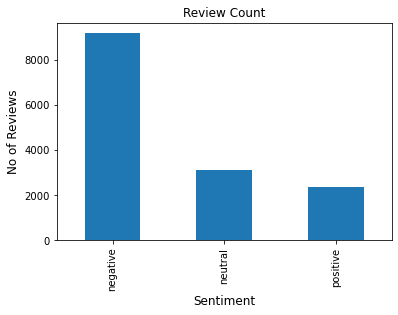

In [14]:
import matplotlib.pyplot as plt
df1.groupby(['sentiment_polarity']).count().negative_reason.plot(kind='bar', title='Review Count')
plt.xlabel('Sentiment', fontsize = 12)
plt.ylabel('No of Reviews', fontsize = 12)

Text(0, 0.5, 'No of Review')

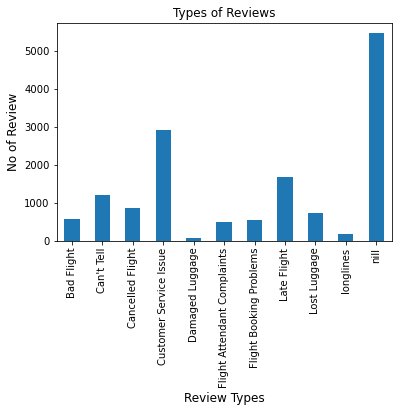

In [15]:
df1.groupby(['negative_reason']).count().sentiment_polarity.plot(kind='bar', title = 'Types of Reviews')
plt.xlabel('Review Types', fontsize = 12)
plt.ylabel('No of Review', fontsize = 12)

Text(0, 0.5, 'No of Reviews')

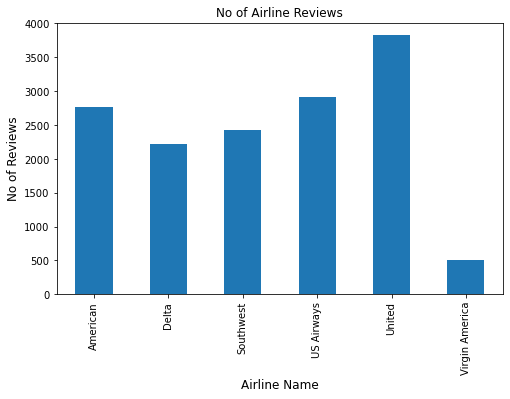

In [139]:
plt.figure(figsize=(8,5))
df1.groupby(['airline_name']).count().sentiment_polarity.plot(kind='bar', title = 'No of Airline Reviews')
plt.xlabel('Airline Name', fontsize = 12)
plt.ylabel('No of Reviews', fontsize = 12)

<AxesSubplot:xlabel='sentiment_polarity,airline_name'>

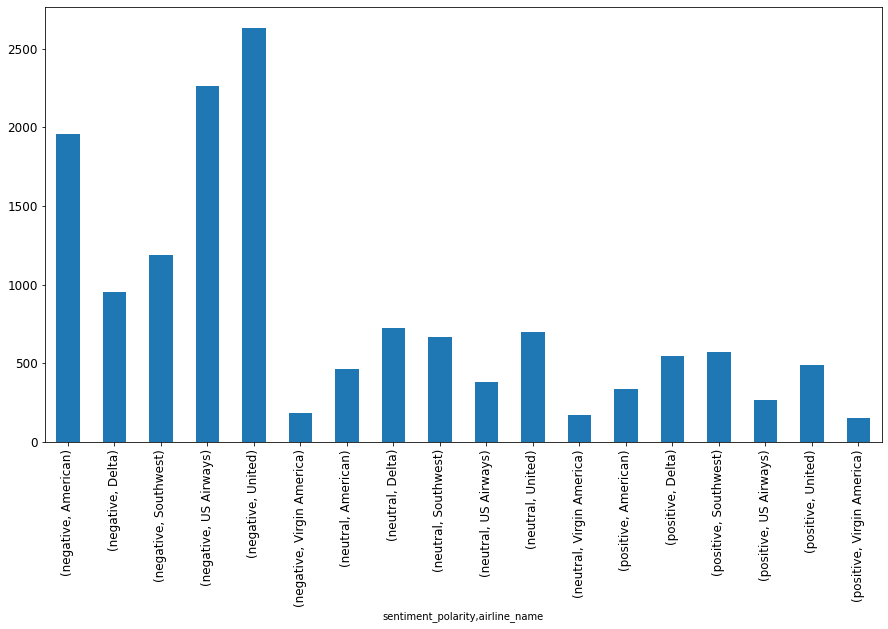

In [59]:
plt.figure(figsize=(15,8))
df1.groupby(['sentiment_polarity','airline_name'])['airline_name'].count().plot(kind='bar',fontsize=12)

In [64]:
df_pos = df1[df1['sentiment_polarity'] == 'positive']
df_neg = df1[df1['sentiment_polarity'] == 'negative']
df_neu = df1[df1['sentiment_polarity'] == 'neutral']

Text(0, 0.5, 'Positive Reviews')

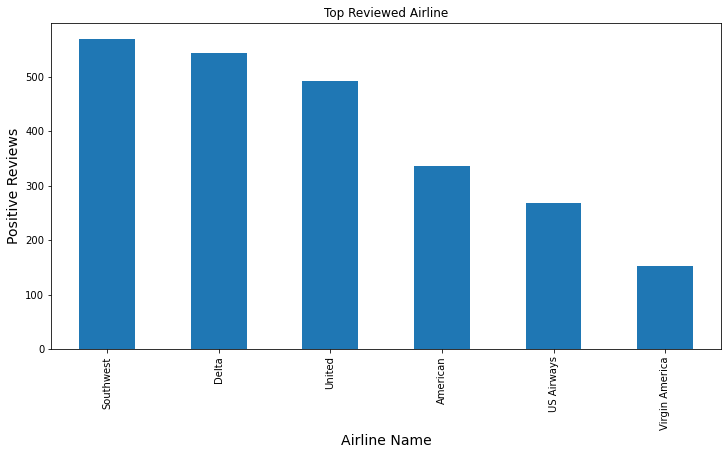

In [140]:
plt.figure(figsize=(12,6))
df_pos.groupby(['airline_name']).count().sentiment_polarity.sort_values(ascending=False).plot(kind='bar', title = 'Top Reviewed Airline')
plt.xlabel('Airline Name', fontsize = 14)
plt.ylabel('Positive Reviews',fontsize = 14)

In [100]:
df_neg.head(2)

,sentiment_polarity,negative_reason,airline_name,Review
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


Text(0, 0.5, 'Negative Reviews')

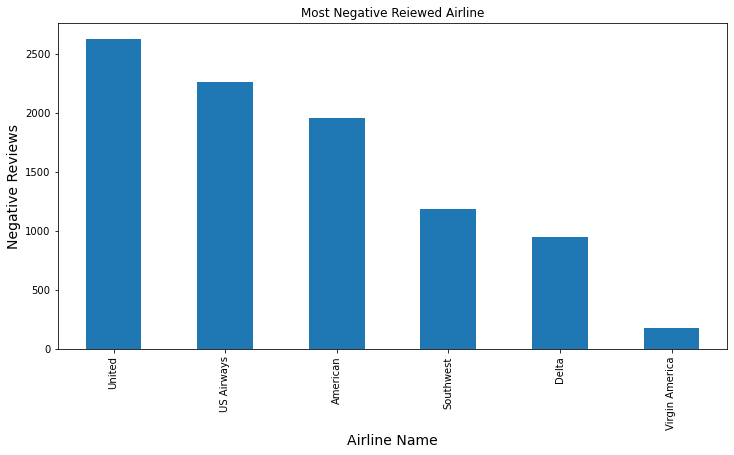

In [142]:
plt.figure(figsize=(12,6))
df_neg.groupby(['airline_name']).count().sentiment_polarity.sort_values(ascending=False).plot(kind='bar', title = 'Most Negative Reviewed Airline')
plt.xlabel('Airline Name', fontsize = 14)
plt.ylabel('Negative Reviews',fontsize = 14)

Text(0, 0.5, 'No of Complaints')

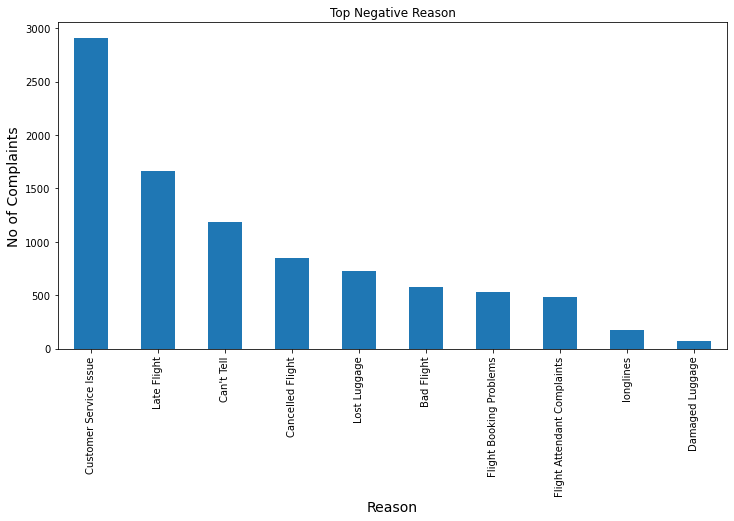

In [127]:
plt.figure(figsize=(12,6))
df_neg.groupby(['negative_reason']).count().airline_name.sort_values(ascending=False).plot(kind='bar', title = 'Top Negative Reason')
plt.xlabel('Reason', fontsize = 14)
plt.ylabel('No of Complaints',fontsize = 14)

In [128]:
df_southwest = df1[df1['airline_name'] == 'Southwest']
df_southwest.head(2)

,sentiment_polarity,negative_reason,airline_name,Review
4326,negative,longlines,Southwest,@SouthwestAir still waiting. Just hit one hour.
4327,negative,Cancelled Flight,Southwest,@SouthwestAir although I'm not happy you Cance...


Text(0, 0.5, 'No of Reviews')

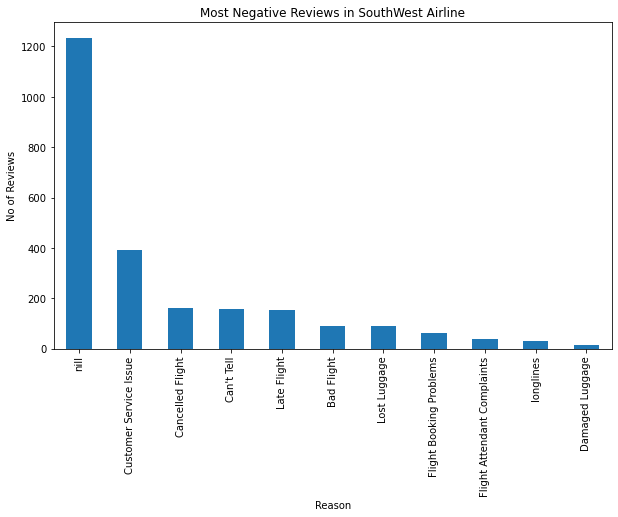

In [148]:
plt.figure(figsize=(10,6))
df_southwest.groupby(['negative_reason']).count().airline_name.sort_values(ascending=False).plot(kind='bar', title = 'Most Negative Reviews in SouthWest Airline')
plt.xlabel('Reason')
plt.ylabel('No of Reviews')

In [130]:
df_delta = df1[df1['airline_name'] == 'Delta']
df_delta.head(2)

,sentiment_polarity,negative_reason,airline_name,Review
6746,positive,nill,Delta,@JetBlue Yesterday on my way from EWR to FLL j...
6747,neutral,nill,Delta,@JetBlue I hope so because I fly very often an...


Text(0, 0.5, 'No of Reviews')

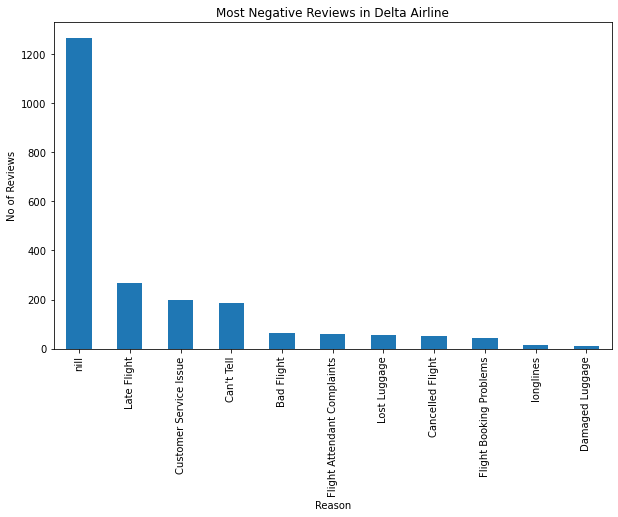

In [147]:
plt.figure(figsize=(10,6))
df_delta.groupby(['negative_reason']).count().airline_name.sort_values(ascending=False).plot(kind='bar', title = 'Most Negative Reviews in Delta Airline')
plt.xlabel('Reason')
plt.ylabel('No of Reviews')

In [132]:
df_united = df1[df1['airline_name'] == 'United']
df_united.head(2)

,sentiment_polarity,negative_reason,airline_name,Review
504,positive,nill,United,@united thanks
505,positive,nill,United,@united Thanks for taking care of that MR!! Ha...


Text(0, 0.5, 'No of Reviews')

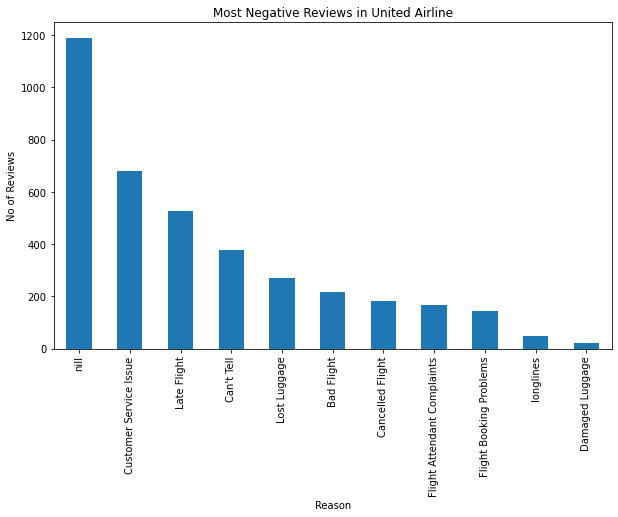

In [146]:
plt.figure(figsize=(10,6))
df_united.groupby(['negative_reason']).count().airline_name.sort_values(ascending=False).plot(kind='bar', title = 'Most Negative Reviews in United Airline')
plt.xlabel('Reason')
plt.ylabel('No of Reviews')

In [134]:
df_american = df1[df1['airline_name'] == 'American']
df_american.head(2)

,sentiment_polarity,negative_reason,airline_name,Review
11879,negative,Customer Service Issue,American,@AmericanAir why would I even consider continu...
11880,neutral,nill,American,@AmericanAir we've already made other arrangem...


Text(0, 0.5, 'No of Reviews')

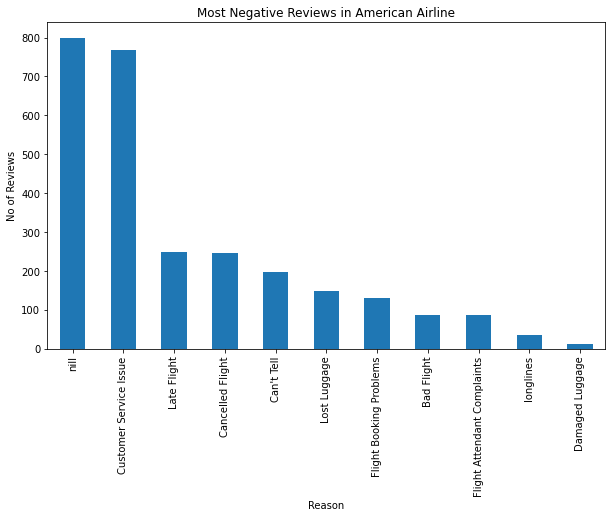

In [145]:
plt.figure(figsize=(10,6))
df_american.groupby(['negative_reason']).count().airline_name.sort_values(ascending=False).plot(kind='bar', title = 'Most Negative Reviews in American Airline')
plt.xlabel('Reason')
plt.ylabel('No of Reviews')

In [135]:
df_us = df1[df1['airline_name'] == 'US Airways']
df_us.head(2)

,sentiment_polarity,negative_reason,airline_name,Review
8966,negative,Flight Booking Problems,US Airways,@USAirways is there a better time to call? My...
8967,negative,Customer Service Issue,US Airways,@USAirways and when will one of these agents b...


Text(0, 0.5, 'No of Reviews')

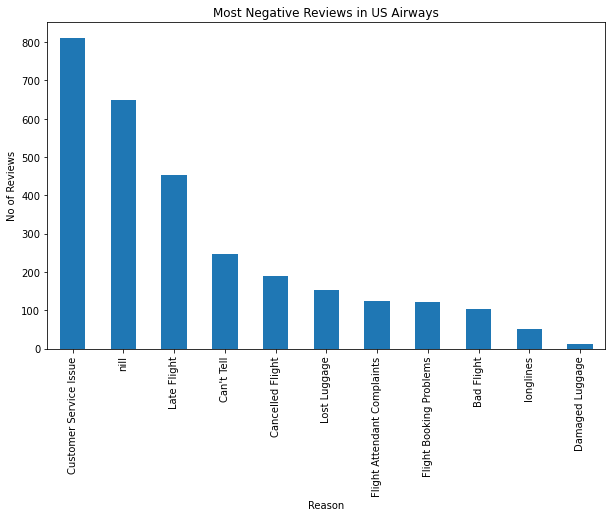

In [144]:
plt.figure(figsize=(10,6))
df_us.groupby(['negative_reason']).count().airline_name.sort_values(ascending=False).plot(kind='bar', title = 'Most Negative Reviews in US Airways')
plt.xlabel('Reason')
plt.ylabel('No of Reviews')

In [137]:
df_virgin = df1[df1['airline_name'] == 'Virgin America']
df_virgin.head(2)

,sentiment_polarity,negative_reason,airline_name,Review
0,neutral,nill,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,nill,Virgin America,@VirginAmerica plus you've added commercials t...


Text(0, 0.5, 'No of Reviews')

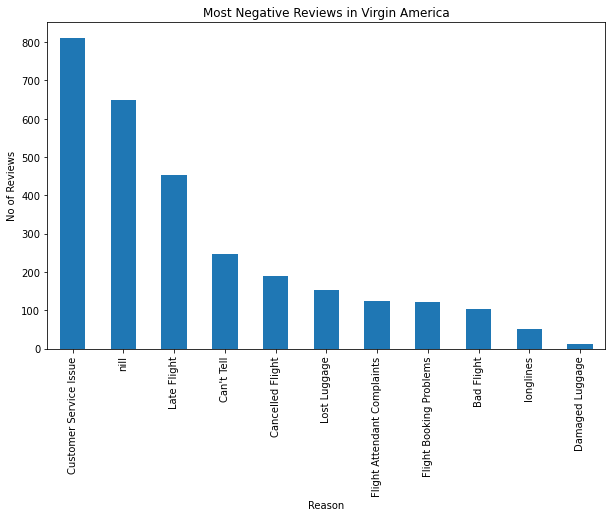

In [143]:
plt.figure(figsize=(10,6))
df_us.groupby(['negative_reason']).count().airline_name.sort_values(ascending=False).plot(kind='bar', title = 'Most Negative Reviews in Virgin America')
plt.xlabel('Reason')
plt.ylabel('No of Reviews')